 ![Age Distribution](https://quizizz.com/media/resource/gs/quizizz-media/quizzes/e1a934ef-b7d0-4887-9439-9ba6485a18e2)
# Bank Customer Purchase Prediction Project


This project builds a Decision Tree classifier to predict whether a bank customer will subscribe to a term deposit. It uses demographic, financial, and behavioral attributes available in the `bank.csv` dataset sourced from the UCI Machine Learning Repository. 

By analyzing variables such as age, job type, account balance, contact method, and campaign details, we aim to uncover patterns that drive customer decisions. The Decision Tree model offers interpretability and strong feature-based insights that support effective targeting and strategic marketing.

---

# Decision Tree Classifier on Bank Marketing Dataset

This project builds a Decision Tree classifier to predict whether a bank customer will subscribe to a term deposit, using the `bank.csv` dataset sourced from the UCI Machine Learning Repository.

The dataset includes customer attributes such as age, job, marital status, account balance, previous campaign outcomes, and contact strategy. Through preprocessing and feature encoding, the model transforms categorical data for machine learning readiness.

A Decision Tree model is then trained to classify subscription behavior (`yes` or `no`). This model is chosen for its interpretability and visual clarity, helping stakeholders understand how different factors influence customer decisions. Performance is evaluated using accuracy and a classification report, and the tree is visualized for decision-path insights.


Dataset preview:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Column types:
 age           int64
job          object
marital      object
education    obje

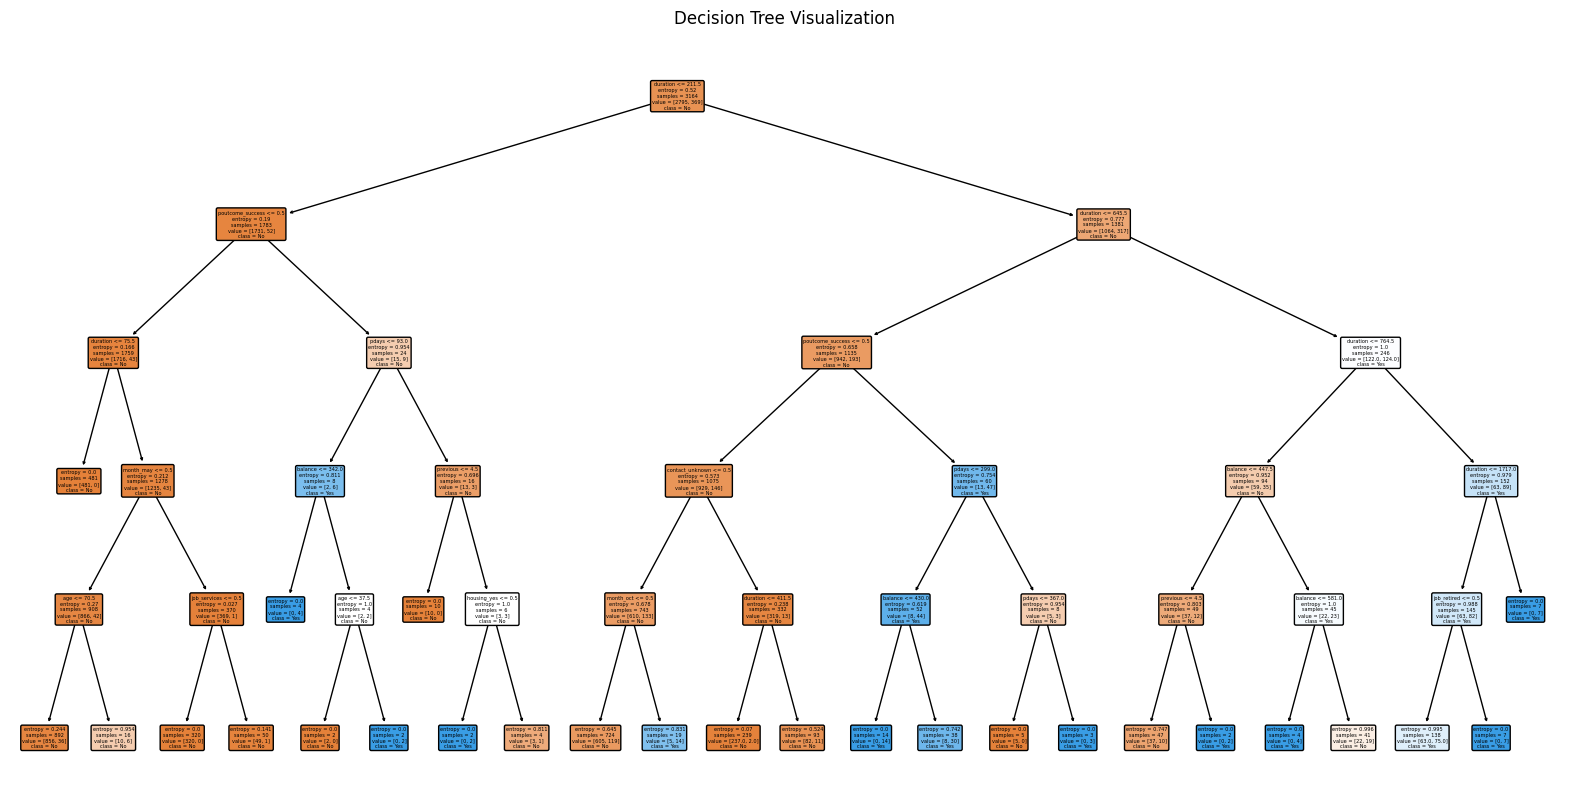

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'data\bank\bank.csv', sep=';')  # Ensure correct separator


# Inspect the dataset
print("Dataset preview:\n", df.head())
print("\nColumn types:\n", df.dtypes)

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define target and features
X = df_encoded.drop('y_yes', axis=1)  # After encoding, 'y_yes' is the target
y = df_encoded['y_yes']              # 1 if customer subscribed, 0 otherwise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [23]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Distribution of Subscription Outcome

This plot shows the count of customers who subscribed (`yes`) and did not subscribe (`no`) to the term deposit offer.

```python

C:\Users\A\AppData\Local\Temp\ipykernel_17916\217145385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


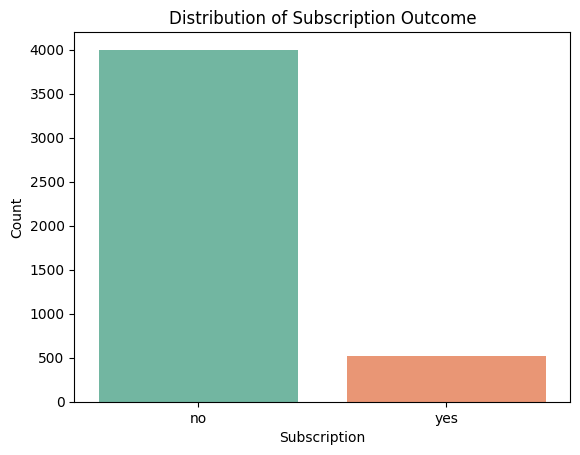

In [24]:
import seaborn as sns

sns.countplot(x='y', data=df, palette='Set2')
plt.title('Distribution of Subscription Outcome')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()


### Customer Age Distribution

This histogram visualizes the distribution of customer ages in the dataset. A kernel density estimate (KDE) is overlaid to show the probability density of age values.

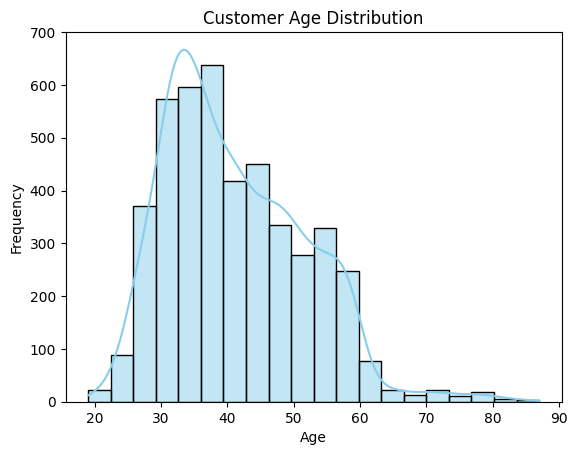

In [25]:
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Job Titles vs. Subscription Outcome

This count plot shows the distribution of different job categories and how they correlate with the subscription outcome (`yes` or `no`). It helps identify which professions are more likely to subscribe to a term deposit.

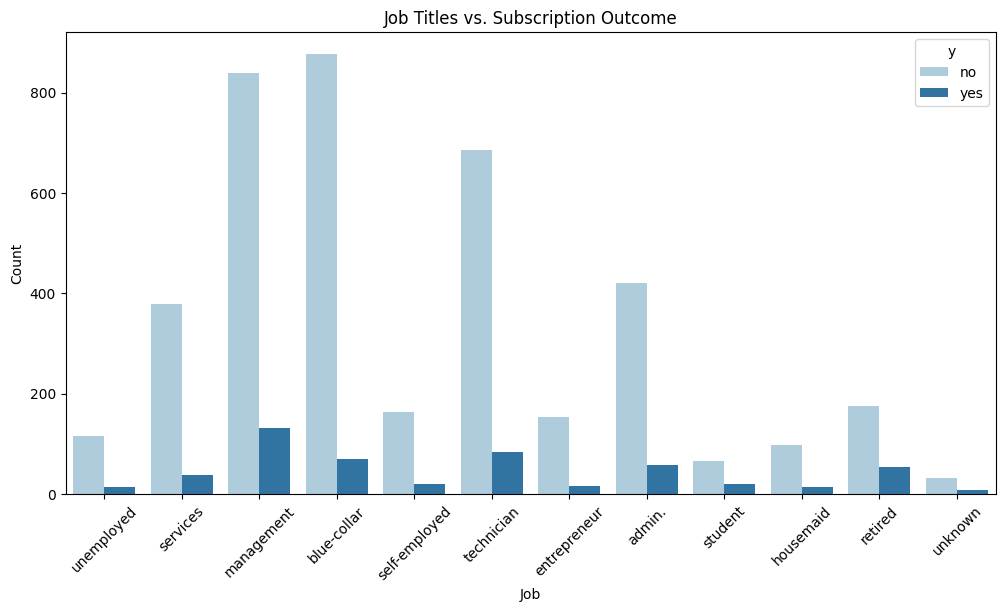

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='y', data=df, palette='Paired')
plt.xticks(rotation=45)
plt.title('Job Titles vs. Subscription Outcome')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


### Marital Status vs. Subscription Outcome

This count plot illustrates the relationship between marital status and the likelihood of subscribing to a term deposit. It compares subscription counts (`yes` or `no`) across different marital categories.


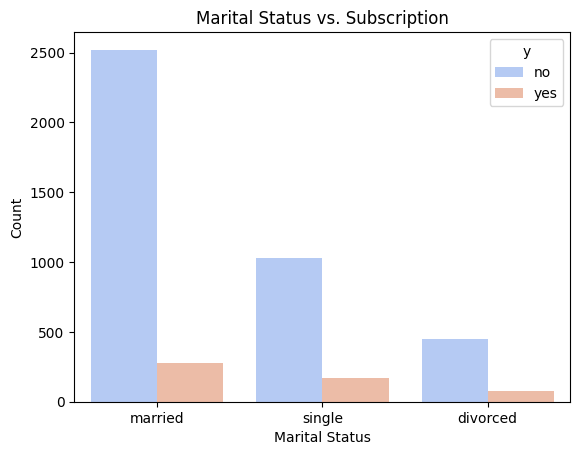

In [27]:
sns.countplot(x='marital', hue='y', data=df, palette='coolwarm')
plt.title('Marital Status vs. Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


### Balance Distribution by Subscription Outcome

This box plot displays how account balances differ between customers who subscribed and those who did not. It highlights the presence of outliers and helps assess the financial standing of each group.


C:\Users\A\AppData\Local\Temp\ipykernel_17916\163294179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='balance', data=df, palette='Set3')


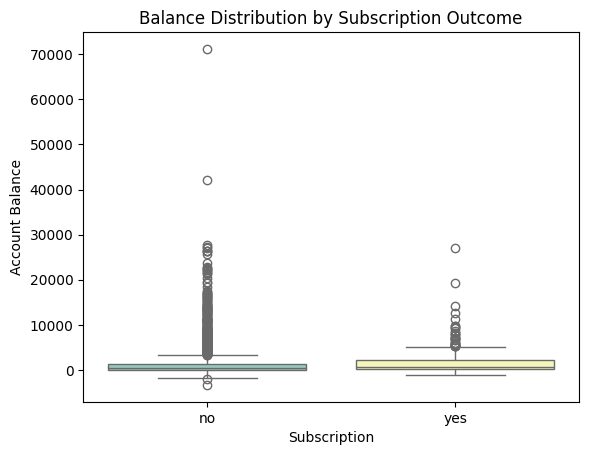

In [28]:
sns.boxplot(x='y', y='balance', data=df, palette='Set3')
plt.title('Balance Distribution by Subscription Outcome')
plt.xlabel('Subscription')
plt.ylabel('Account Balance')
plt.show()


### Contact Method vs. Subscription

This count plot illustrates the relationship between the type of contact method used (such as cellular or telephone) and the customer's subscription outcome. It helps assess which communication channel is more effective in encouraging subscriptions.


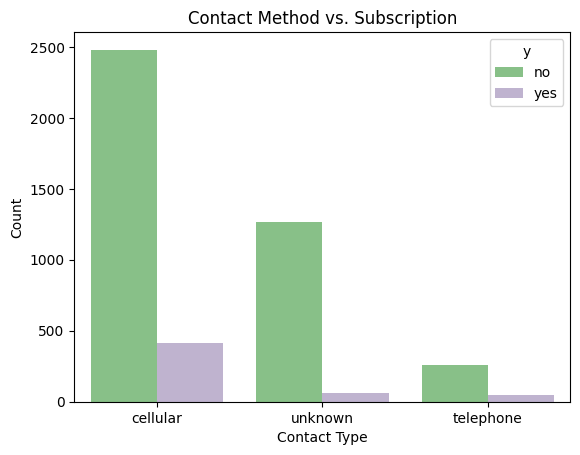

In [29]:
sns.countplot(x='contact', hue='y', data=df, palette='Accent')
plt.title('Contact Method vs. Subscription')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()


### Call Duration by Subscription Outcome

This histogram shows the distribution of call durations (`duration`) differentiated by the subscription outcome (`y`). It provides insights into whether longer call durations are associated with higher subscription rates. The plot includes kernel density estimation (KDE) for a smoother view of distribution patterns.


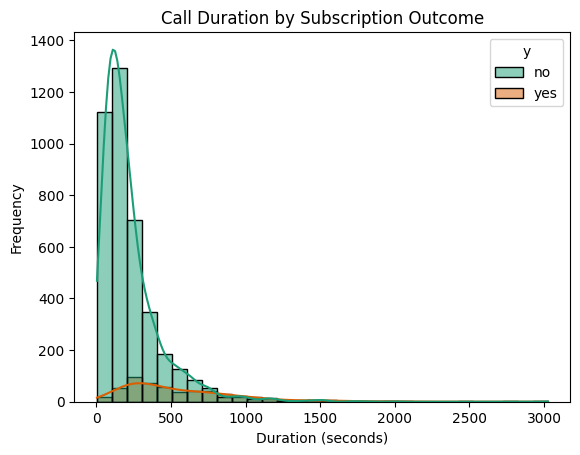

In [30]:
sns.histplot(data=df, x='duration', hue='y', kde=True, palette='Dark2', bins=30)
plt.title('Call Duration by Subscription Outcome')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


### Balance Distribution by Subscription Outcome (Violin Plot)

This violin plot visualizes the distribution of account balances (`balance`) with respect to subscription outcomes (`y`). It combines a box plot and a kernel density plot to show the central tendency, spread, and distribution shape for each category (`yes` or `no`).

The inner quartile lines help identify median and interquartile ranges, providing deeper insights into how account balance may influence customer subscription behavior.


C:\Users\A\AppData\Local\Temp\ipykernel_17916\2025600968.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y='balance', data=df, palette='Pastel1', inner='quartile')


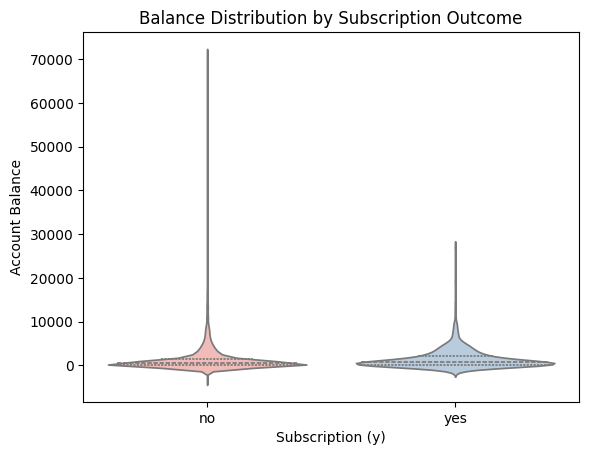

In [31]:
sns.violinplot(x='y', y='balance', data=df, palette='Pastel1', inner='quartile')
plt.title('Balance Distribution by Subscription Outcome')
plt.xlabel('Subscription (y)')
plt.ylabel('Account Balance')
plt.show()


### Distribution of Account Balance

This histogram visualizes the distribution of customer account balances. The plot includes a kernel density estimate (KDE) curve to show the probability density of the data.

It helps identify how balances are distributed across the customer base and whether there are outliers or skewness in the financial data.


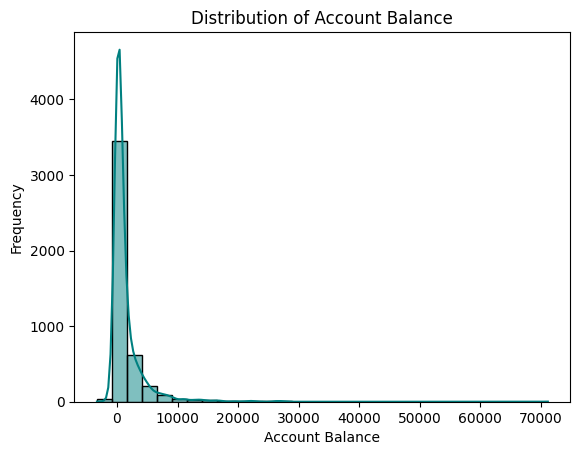

In [32]:
sns.histplot(df['balance'], bins=30, kde=True, color='teal')
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()


### Age vs. Account Balance Colored by Subscription

This scatter plot visualizes the relationship between a customer's age and their account balance. Each point represents an individual customer, and the color indicates whether they subscribed to the term deposit.

This plot helps identify potential patterns or clusters where age and balance might influence subscription decisions.


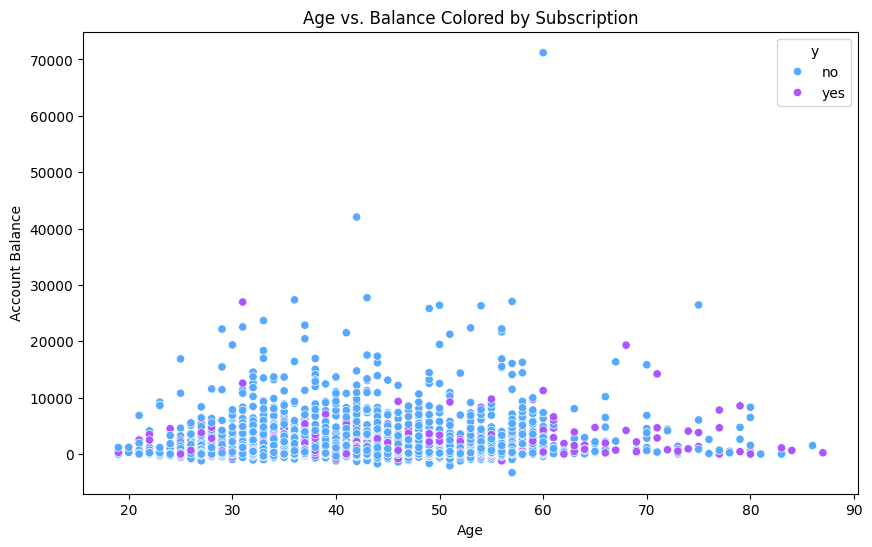

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='balance', hue='y', data=df, palette='cool')
plt.title('Age vs. Balance Colored by Subscription')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()


## Project Highlights: Bank Marketing Subscription Prediction

### Key Insights from EDA:

- **Class Imbalance Observed**: Most customers did not subscribe to a term deposit. This highlights the need to handle imbalance during modeling.

- **Age Distribution**: Subscriptions are more frequent among middle-aged customers (30–60 years).

- **Job Influence**: Certain professions like students and retired individuals show higher subscription rates.

- **Marital Status Impact**: Single customers are more likely to subscribe than married or divorced customers.

- **Balance Levels**: Higher account balances are generally associated with a positive subscription outcome.

- **Contact Method**: Cellular contacts perform better than telephone contacts in converting customers.

- **Call Duration**: Longer call durations significantly increase the likelihood of a successful subscription.

- **Balance Violin Plot**: Subscribed customers tend to have a wider range of balances, with some high outliers.

- **Age vs. Balance**: No strong linear pattern, but some clusters indicate favorable zones for marketing efforts.

---

## Final Remarks

This project demonstrates the effectiveness of Exploratory Data Analysis (EDA) in uncovering actionable insights from banking data. Using various visual tools like histograms, boxplots, and violin plots, we gained a better understanding of customer behavior and attributes influencing term deposit subscriptions.

These insights form a strong foundation for developing a Decision Tree Classifier, ensuring the model is trained on relevant and well-understood features.

---

## Project Information

- **Project Title**: Decision Tree Classifier on Bank Marketing Dataset
- **Objective**: To predict whether a customer will subscribe to a term deposit using classification techniques and EDA.
- **Dataset**: Bank Marketing Dataset – UCI Repository

---

## Author

- **Name**: Nitish M.
- **Role**: Undergraduate Student – Data Science
